In [ ]:
#In this block of code we will define our libraries
import numpy as np
# this library is used to convert the images into numbers or matrices of numbers
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# this library is used to draw graphs or plots
import os
# this library is used to read extensions from drivers inside operating system
import cv2
# this library is used to be able to import the dataset that you will use
from tqdm import tqdm
# this library is used to see the progress of reading data from your data set
import tensorflow as tf
from tensorflow import keras
################################
import glob as gb
# This library 'glob' is used to retreive the files that match a particular pattern
import seaborn as sns
# This library 'seaborn' is used for creating statstical visual content with good colors and schems
sns.set(style="whitegrid")


In [ ]:
#In this Block of code we will know number of images inside each category
FolderName = '/content/drive/MyDrive/Eyes'
#this variable includes the name of the dataset categories and they must be the same names of categories
categories = ["normal","cataract","glaucoma","diabetic_retinopathy"]
#this variable includes the names of the categories inside the main dataset
for cat in categories:
    #This for loop for iterate on each category in the dataset to read its images
    path = os.path.join(FolderName,cat)
    #this variable includes the path of our dataset with all its categories
    files=gb.glob(pathname=(path+'/*.jpg'))+gb.glob(pathname=(path+'/*.png'))+gb.glob(pathname=(path+'/*.jpeg'))
    #this function (gb.glob) is used to retreive all the files that end with '.png'
    print(f'Found {len(files)} in folder {cat}')
'''  
  x=0
    #this counter for counting number of images that we want to print
    for image in os.listdir(path):
        #this for loop for printing the images inside each category in the dataset
        x+=1
        img_read=cv2.imread(os.path.join(path,image),cv2.IMREAD_GRAYSCALE)
        #this variable holds the image: First parameter for joining the path of the category and image name together to have the full path
        # The second parameter for converting it to gray scale 'and you can ignore it' 
        plt.imshow (img_read, cmap='gray')
        #in the previous statement we edit the parameters before displaying the image
        plt.show()
        #used for displaying image
        if x==4:
            break
'''

Found 1074 in folder normal
Found 1038 in folder cataract
Found 1007 in folder glaucoma
Found 1098 in folder diabetic_retinopathy


"  \n  x=0\n    #this counter for counting number of images that we want to print\n    for image in os.listdir(path):\n        #this for loop for printing the images inside each category in the dataset\n        x+=1\n        img_read=cv2.imread(os.path.join(path,image),cv2.IMREAD_GRAYSCALE)\n        #this variable holds the image: First parameter for joining the path of the category and image name together to have the full path\n        # The second parameter for converting it to gray scale 'and you can ignore it' \n        plt.imshow (img_read, cmap='gray')\n        #in the previous statement we edit the parameters before displaying the image\n        plt.show()\n        #used for displaying image\n        if x==4:\n            break\n"

In [ ]:
#This function is used for 'Output Encoding'
code = {'normal':0, 'cataract':1, 'glaucoma':2, 'diabetic_retinopathy':3}
#this function is used to return the string name when the passed code is its number 
#ex: if the function receives 1 it will return '2_cataract'
def get_code(n):
  # in this for loop it will loop on each element inside dictionary and return 2 things (x:is the string value)
  # (and y: is the number refers to that string value)
  for x,y in code.items():
    if n == y:
      return x

In [ ]:
#This block is used to resize the images
width=100
height=100
x=[]
y=[]
FolderName = '/content/drive/MyDrive/Eyes'
#this variable includes the name of the dataset categories and they must be the same names of categories
categories = ["normal","cataract","glaucoma","diabetic_retinopathy"]
#this variable includes the names of the categories inside the main dataset
for cat in categories:
    #This for loop for iterate on each category in the dataset to read its images
    path = os.path.join(FolderName,cat)
    #this variable includes the path of our dataset with all its categories
    files=gb.glob(pathname=(path+'/*.jpg'))+gb.glob(pathname=(path+'/*.png'))+gb.glob(pathname=(path+'/*.jpeg'))
    #the variable 'file' includes all the images (the data that ends with '.png')
    for img in files:
      #here we iterate on each image to store it in a variable and change its size then append it to our data
      image=cv2.imread(img)
      image_array=cv2.resize(image,(width,height))
      x.append(list(image_array))
      #here we append the index of each lable for each image in output array 'y' to use it later in encoding
      y.append(code[cat])

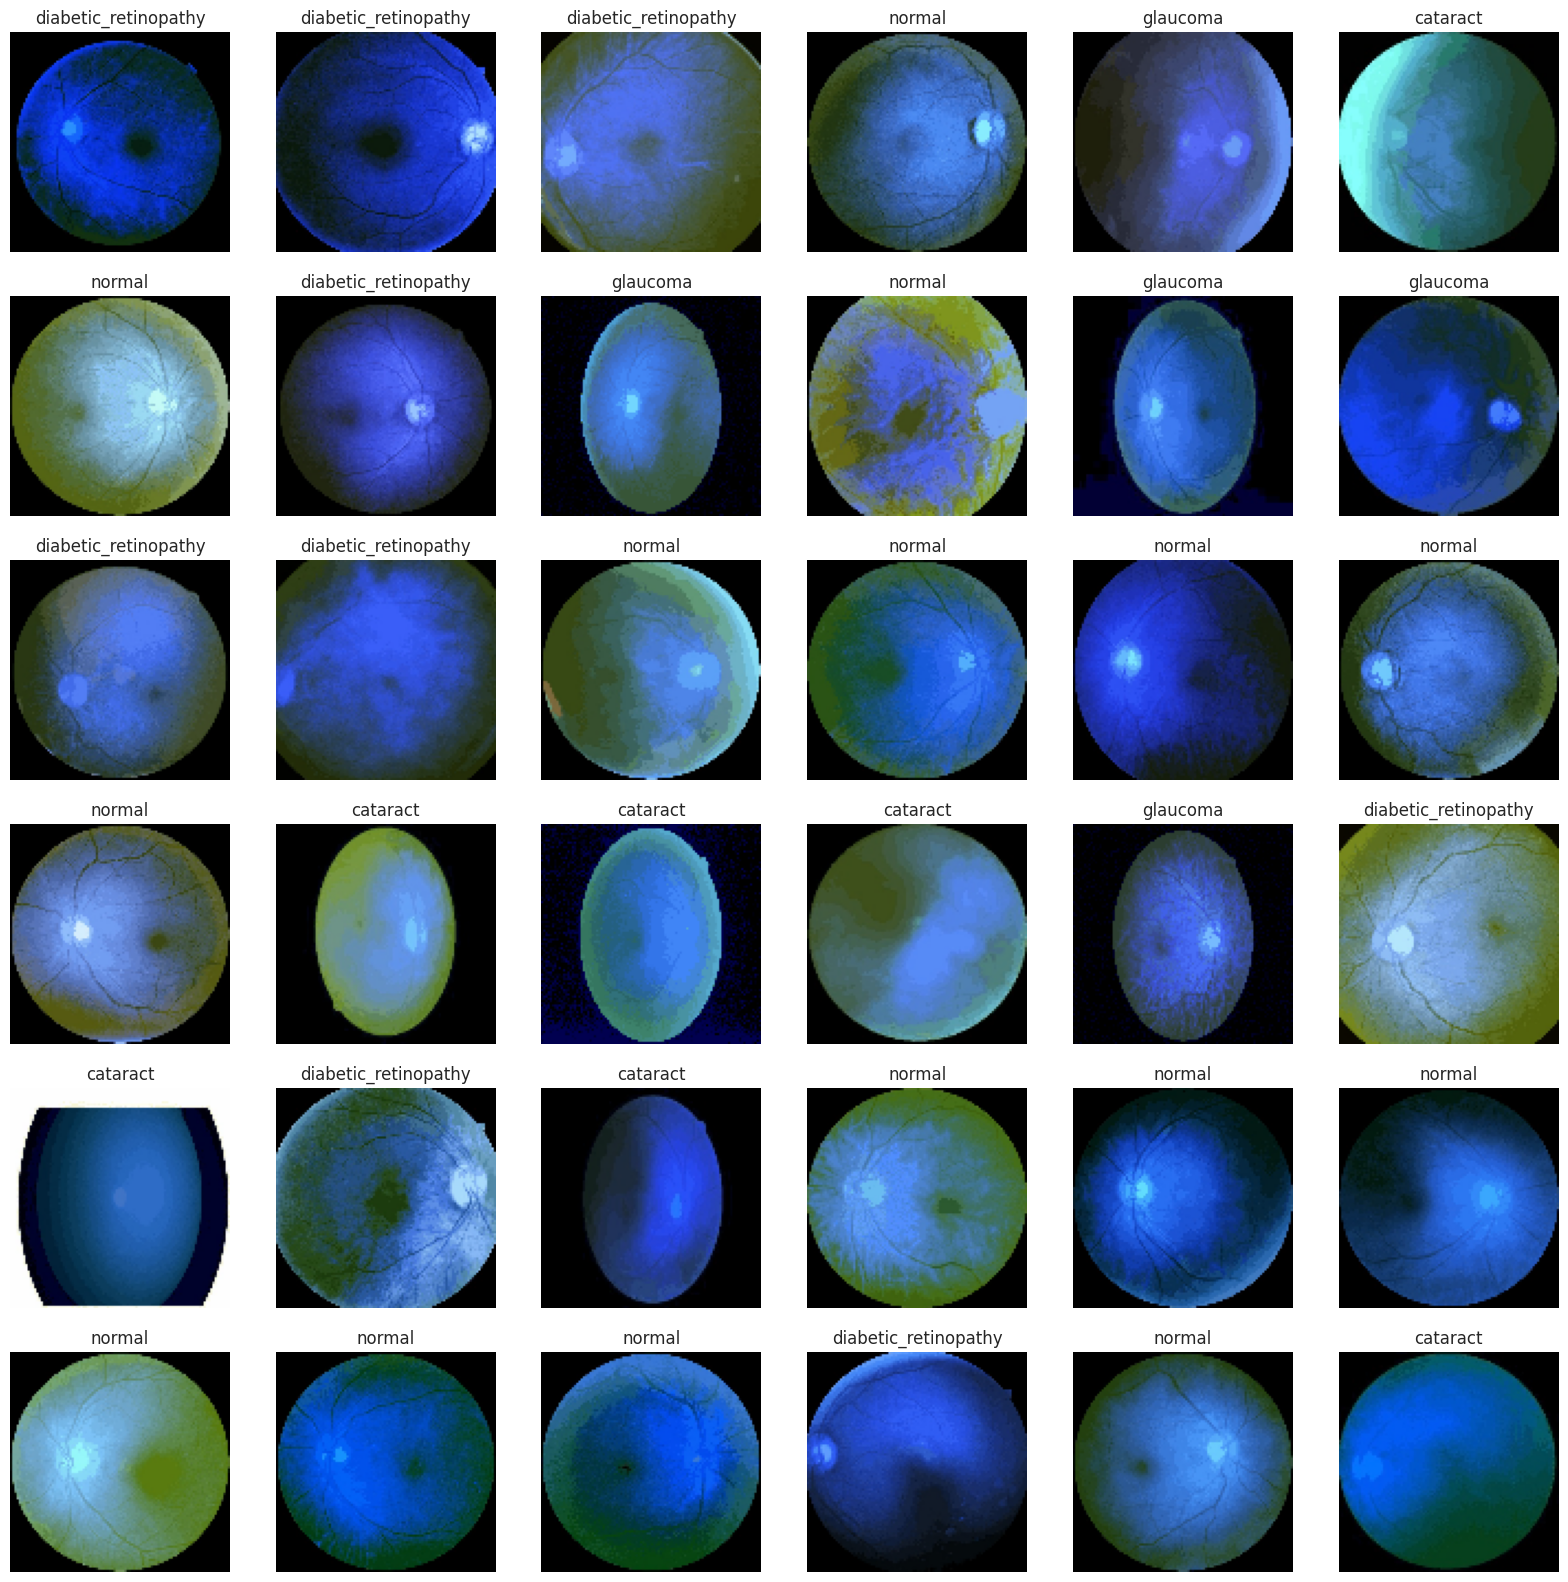

In [ ]:
#This block for displaying some of the data with their labels
# Determining number of pixels appear in the figure
plt.figure(figsize=(20,20))
# 'enumerate' for generating random number between 0 to len of data which is x and number of generated number is 36
# the difference between 'i & n' is :
# 'i' is the index that will give us the image and its label
# 'n' is the place where the plot will draw the image and it increases by one each iteration
for n, i in enumerate (list (np.random.randint(0,len(x),36))):
  plt.subplot(6,6,n+1)
  plt.imshow(x[i])
  plt.axis('off')
  plt.title(get_code(y[i]))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x,y,test_size= 0.1, random_state=40)
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [ ]:
from keras.api._v2.keras import activations
model= keras.models.Sequential([
    #The CNN code is mainly used for extracting features
    # Notice the 'input_shape' is only exist in the first layer because the inputs only enter the first layer
    # Then the layer produces output that become input for the comming or the next layer
    # The input shape is (height, width, 3) '3' means the image is RGB
    keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(height,width,3)),
    keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPool2D(4,4),
    keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),
    keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),
    keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPool2D(4,4),
    #Remember the 'flatten' function is used to convert the output whatever it's to a 1D array or vector
    #to be able to use it later
    keras.layers.Flatten(),
    ############################################################
    #Until here the CNN part is finished now we start our normal neural networks
    #So now our features are ready for entering the normal NN model that we paraphrased previously
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    #Remember the Drop out operation is used to minimize the overfitting by removing some of cells
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(4,activation='softmax'),
])


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
epoc=25
#batch_size: for determining the samples of image that you will use with each iteration
#verbose: for determining how much details you want to display with each epoch the larger verbose the large details
thisModel= model.fit(x_train,y_train,epochs=epoc,batch_size=64,verbose=1)

Epoch 1/25
60/60 [==============================] - 31s 213ms/step - loss: 1.5668 - accuracy: 0.3602
Epoch 2/25
60/60 [==============================] - 11s 177ms/step - loss: 1.0596 - accuracy: 0.4954
Epoch 3/25
60/60 [==============================] - 11s 178ms/step - loss: 0.9674 - accuracy: 0.5291
Epoch 4/25
60/60 [==============================] - 11s 178ms/step - loss: 0.8682 - accuracy: 0.5700
Epoch 5/25
60/60 [==============================] - 11s 178ms/step - loss: 0.8300 - accuracy: 0.6013
Epoch 6/25
60/60 [==============================] - 11s 179ms/step - loss: 0.7915 - accuracy: 0.6250
Epoch 7/25
60/60 [==============================] - 11s 180ms/step - loss: 0.7250 - accuracy: 0.6601
Epoch 8/25
60/60 [==============================] - 11s 181ms/step - loss: 0.7040 - accuracy: 0.6632
Epoch 9/25
60/60 [==============================] - 11s 180ms/step - loss: 0.6830 - accuracy: 0.6667
Epoch 10/25
60/60 [==============================] - 11s 181ms/step - loss: 0.6664 - accura

In [ ]:
ModelLoss, ModelAccuracy = model.evaluate(x_test,y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy))

14/14 [==============================] - 2s 57ms/step - loss: 0.5153 - accuracy: 0.8009
Test Loss is 0.5152905583381653
Test Accuracy is 0.8009478449821472
